## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/mouse_metadata.csv"
study_results_path = "data/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_studycombined = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_studycombined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(mouse_studycombined["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_studycombined.drop_duplicates(subset = ['Mouse ID','Timepoint'])
len(dup_mice)

1888

In [142]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = dup_mice.drop_duplicates(subset=['Mouse ID'], keep='last')
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice["Mouse ID"])

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = dup_mice.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median = dup_mice.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
var = dup_mice.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
std = dup_mice.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem = dup_mice.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
summary_statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var,"Standard Dev.": std, "SEM": sem})
summary_statistics.head()


,Mean,Median,Variance,Standard Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_table = dup_mice.groupby('Drug Regimen').agg({"Tumor Volume (mm3)" : ["mean","median","var","std","sem"]})
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = summary_table.rename(columns={"mean":"Mean", "median":"Median", "var":"Variance", "std":"Standard Dev.", "sem":"SEM"})
summary_table.head()

Tumor Volume (mm3)                                              
                           Mean     Median   Variance Standard Dev.       SEM
Drug Regimen                                                                 
Capomulin             40.675741  41.557809  24.947764      4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177      6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684      6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577      8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479      8.134708  0.596466

## Bar and Pie Charts

<IPython.core.display.Javascript object>


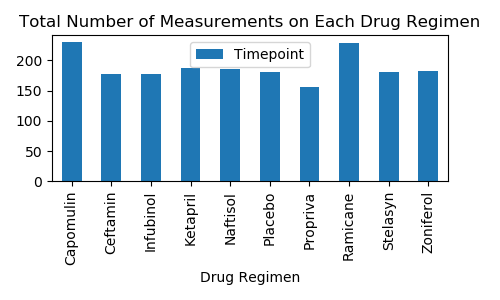

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_total = dup_mice.groupby("Drug Regimen").agg({"Timepoint":'count'})
regimen_total.plot(kind="bar", figsize=(5,3))
plt.title("Total Number of Measurements on Each Drug Regimen")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


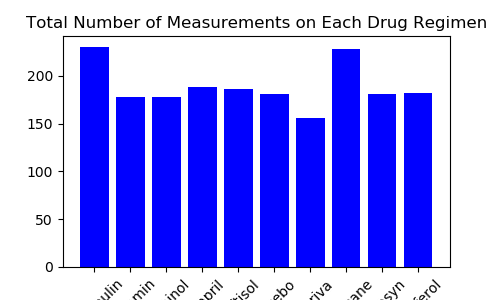

Text(0.5, 1.0, 'Total Number of Measurements on Each Drug Regimen')

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(regimen_total))
tick_loc = [value for value in x_axis]
plt.figure(figsize=(5,3))
plt.bar(x_axis, regimen_total["Timepoint"], color='b', align="center")
plt.xticks(tick_loc, regimen_total.index, rotation=45)
plt.title("Total Number of Measurements on Each Drug Regimen")

<IPython.core.display.Javascript object>


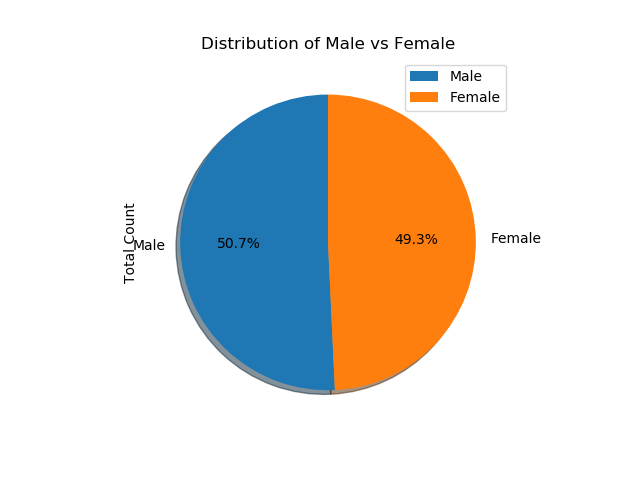

Text(0.5, 1.0, 'Distribution of Male vs Female')

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = dup_mice["Sex"].value_counts()
gender_demographics = pd.DataFrame ({
    "Total Count": gender_count,
    })
gender_demographics.plot(kind='pie', subplots=True , shadow = True, startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Male vs Female')

<IPython.core.display.Javascript object>


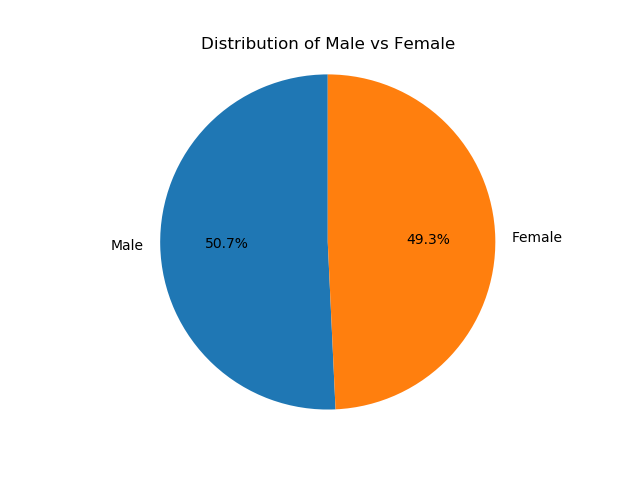

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
dup_mice["Sex"].value_counts()
count = [958, 930]
labels = 'Male', 'Female'
plt.pie(count,labels=labels,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Male vs Female')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs = dup_mice.loc[(dup_mice["Drug Regimen"] == "Capomulin") | (dup_mice["Drug Regimen"] == "Ramicane") | (dup_mice["Drug Regimen"] == "Infubinol") | (dup_mice["Drug Regimen"] == "Ceftamin"), :]
# Start by getting the last (greatest) timepoint for each mouse
four_drugs = four_drugs.sort_values("Timepoint", ascending = False)
# With the df sorted, drop all other values other than the first, or the "greatest" timepoint
four_drugs = four_drugs.drop_duplicates(subset="Mouse ID", keep='first')
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1


In [140]:
four_drugs["Drug Regimen"].value_counts()

Infubinol    25
Ramicane     25
Capomulin    25
Ceftamin     25
Name: Drug Regimen, dtype: int64

## Calcuating Final Tumor Volume
Calculate the final tumor volume of each mouse across four of the 
most promising treatment regimens: Capomulin, Ramicane, Infubinol, 
and Ceftamin. Calculate the quartiles and IQR and quantitatively 
determine if there are any potential outliers across all four 
treatment regimens.


In [167]:
#creating 4 different df for each of the drug regimens specified for easy reference
capomulin_df = four_drugs.loc[(four_drugs["Drug Regimen"] == "Capomulin"), :]
ramicane_df = four_drugs.loc[(four_drugs["Drug Regimen"] == "Ramicane"), :]
infubinol_df = four_drugs.loc[(four_drugs["Drug Regimen"] == "Infubinol"), :]
ceftamin_df = four_drugs.loc[(four_drugs["Drug Regimen"] == "Ceftamin"), :]

#calculating capomulin potential outliers
capo_quartiles = capomulin_df['Tumor Volume (mm3)'].quantile([.25, .5,.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq - capo_lowerq
capo_lowerbound = capo_lowerq - (1.5*capo_iqr)
capo_upperbound = capo_upperq + (1.5*capo_iqr)

#calculating ramicane potential outliers
rami_quartiles = ramicane_df['Tumor Volume (mm3)'].quantile([.25, .5,.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq - rami_lowerq
rami_lowerbound = rami_lowerq - (1.5*rami_iqr)
rami_upperbound = rami_upperq + (1.5*rami_iqr)

#calculating infubinol potential outliers
infu_quartiles = infubinol_df['Tumor Volume (mm3)'].quantile([.25, .5,.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq - infu_lowerq
infu_lowerbound = infu_lowerq - (1.5*infu_iqr)
infu_upperbound = infu_upperq + (1.5*infu_iqr)

#calculating ceftamin potential outliers
ceft_quartiles = ceftamin_df['Tumor Volume (mm3)'].quantile([.25, .5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_lowerbound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upperbound = ceft_upperq + (1.5*ceft_iqr)

In [176]:
#printing each of the outlier statements

print(f"Capomulin:")
print(f"The lower quartile of tumor volumes is:{capo_lowerq}")
print(f"The upper quartile of tumor volumes is:{capo_upperq}")
print(f"The interquartile range of tumor volumes is:{capo_iqr}")
print(f"Values below {capo_lowerbound} could be outliers.")
print(f"Values below {capo_upperbound} could be outliers.")
print("-------------------------------------------------")
print(f"Ramicane:")
print(f"The lower quartile of tumor volumes is:{rami_lowerq}")
print(f"The upper quartile of tumor volumes is:{rami_upperq}")
print(f"The interquartile range of tumor volumes is:{rami_iqr}")
print(f"Values below {rami_lowerbound} could be outliers.")
print(f"Values below {rami_upperbound} could be outliers.")
print("-------------------------------------------------")
print(f"Infubinol:")
print(f"The lower quartile of tumor volumes is:{infu_lowerq}")
print(f"The upper quartile of tumor volumes is:{infu_upperq}")
print(f"The interquartile range of tumor volumes is:{infu_iqr}")
print(f"Values below {infu_lowerbound} could be outliers.")
print(f"Values below {infu_upperbound} could be outliers.")
print("-------------------------------------------------")
print(f"Ceftamin:")
print(f"The lower quartile of tumor volumes is:{ceft_lowerq}")
print(f"The upper quartile of tumor volumes is:{ceft_upperq}")
print(f"The interquartile range of tumor volumes is:{ceft_iqr}")
print(f"Values below {ceft_lowerbound} could be outliers.")
print(f"Values below {ceft_upperbound} could be outliers.")

Capomulin:
The lower quartile of tumor volumes is:32.37735684
The upper quartile of tumor volumes is:40.1592203
The interquartile range of tumor volumes is:7.781863460000004
Values below 20.70456164999999 could be outliers.
Values below 51.83201549 could be outliers.
-------------------------------------------------
Ramicane:
The lower quartile of tumor volumes is:31.56046955
The upper quartile of tumor volumes is:40.65900627
The interquartile range of tumor volumes is:9.098536719999998
Values below 17.912664470000003 could be outliers.
Values below 54.30681135 could be outliers.
-------------------------------------------------
Infubinol:
The lower quartile of tumor volumes is:54.04860769
The upper quartile of tumor volumes is:65.52574285
The interquartile range of tumor volumes is:11.477135160000003
Values below 36.83290494999999 could be outliers.
Values below 82.74144559000001 could be outliers.
-------------------------------------------------
Ceftamin:
The lower quartile of tumor

<IPython.core.display.Javascript object>


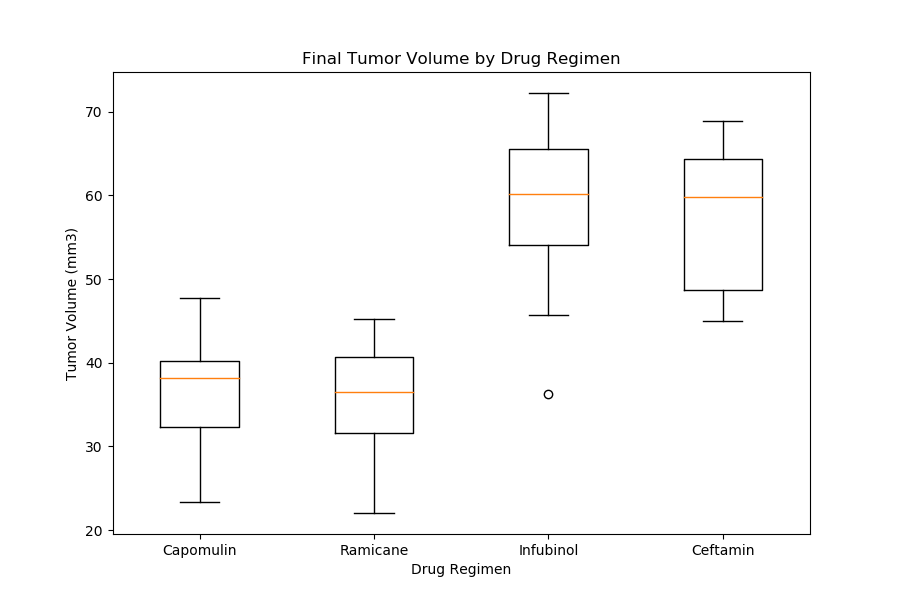

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff7b73984e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff7b6f279b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff7b7398780>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff7b7395898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff7b7398c18>,
 'means': []}

In [192]:
# Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
drug1 = capomulin_df["Tumor Volume (mm3)"]
drug2 = ramicane_df["Tumor Volume (mm3)"]
drug3 = infubinol_df["Tumor Volume (mm3)"]
drug4 = ceftamin_df["Tumor Volume (mm3)"]
data = [drug1, drug2, drug3, drug4]

fig1, ax1 = plt.subplots(figsize=(9, 6))
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.boxplot(data)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#use unique id or iloc

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
